# 1. Objectives and Overview

## 1.1. Overview: Energy Utilities Dataset and Economy Simulation

**Applications: Energy Utilities and Gaming Simulation**
- This project tracks real energy utilities application, usage, and online/mobile applications data from cities that have been renamed to futuristic Hellenic cities, while the user data have been changed, anonymized and altered. The data was based on 2014-2017 consumption and was originally intented to be fused with multiple other datasets for a **massive economy simulation**.
- The dataset is to be used for training in actual energy utilities but is also robust enough for other endeavors, one of which was to be used to **simulate an energy economy** for a **realistic utilities management game**.
- The analysis that follows was designed to deal with actual energy utilities challenges and exploratory analysis.

## 1.2. Project Objectives

- This project involved EDA (exploratory data analysis) for an energy platform, assisting both energy utilities and end-users track their usage. 
- Various metrics will be created to cater to different objectives.
- The objective of this project is not to explore each and every possible analytical angle, but rather to provide an overview of what can be achieved given the current scope and breadth of this particular dataset.
- The current dataset will be enhanced to fit additional metrics. 
- Additionally, in order to further illustrate certain KPI examples, certain novel artificially generated data will be added to counterbalance certain limitations in this dataset (for illustrative purposes).

# 2. Libraries and Preparation

In [1]:
import scipy.stats as stats
from scipy.stats import shapiro, spearmanr, pearsonr
from datetime import date, timedelta
from tabulate import tabulate
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
# suppress futurewarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
path_url = '/kaggle/input/energy-utilities-application-data/energy_utilities_sim.csv'

In [4]:
df = pd.read_csv(path_url)

In [5]:
df.rename(columns = {'average_days_to_bill_payment':'avg_paym',
                     'average_daily_consumption':'avg_dcons',
                     'average_monthly_visits':'avg_mvisits',
                     'average_web_monthly_visits':'avg_webvisits',
                     'average_mobile_monthly_visits':'avg_mobvisits'}, inplace=True)

In [6]:
# converting variable to datetime datatype
df['customer_since'] = pd.to_datetime(df['customer_since'])

In [7]:
df.head()

,user_id,avg_dcons,avg_paym,customer_since,area,age,marital_status,educational_level,prefecture,avg_mvisits,avg_webvisits,avg_mobvisits
0,1,8.02,-33.71,2015-05-14,135,40-55,Married,Master’s degree,Neon-Attika,0.86,0.53,0.33
1,2,25.04,-3.11,2015-06-02,100,30-39,Married,Bachelor’s degree,Corinthus Crossroads,4.13,0.69,3.44
2,3,8.18,15.89,2015-06-29,130,40-55,Married,Master’s degree,Neon-Attika,2.92,2.35,0.56
3,4,12.81,-2.38,2015-03-19,86,40-55,Married,Master’s degree,Neon-Attika,0.82,0.59,0.23
4,5,9.16,14.10,2014-08-22,65,30-39,Married,Bachelor’s degree,Evoa Conglomerate,10.63,3.63,7.00


# 3. Developing KPIs and Feature Engineering

## 3.1. Methodology

There is a plethora of KPIs that could be applied for this analysis ranging from simple day-to-day operations to complex evaluations over future projections. Note due to the nature of this specific dataset some KPIs that depend upon historical data for users are out of our reach, however, there is still enough to work with here.

**Numeric Baseline Metrics:** Baseline numeric metrics are vital for any intelligence operation. Coding expertise is  not required here - just common sense with a touch of curiosity will work in most cases. A few important foundational metrics and KPIs include, for example:
1. Daily and Monthly Energy Usage
2. Energy Usage per Sq.Meter
3. Daily/Monthly Active Users (DAU/MAU) on either platform (metric already available in dataset)
4. Average Payment Rate per User or per Location/Prefecture

**Nomimal Baseline Metrics:** Additionally, various nominal, ordinal, or categorical metrics can be created. These metrics will provide a) a solid understanding of the dataset, b) our customer base, and c) providing detailed insights for other company operations (e.g. marketing).
In this project, such nomimal metrics and KPIs include, for example:
1. Payment behavioral patterns (e.g. customer time-to-payment)
2. Online behavioral patterns (e.g. platform usage)
3. Customer longevity
4. Among other secondary descriptors like level of education, marriage status, etc.

**Advanced KPIs:** The aformentioned, "baseline" metrics (both numeric and nominal) can be leveraged to develop more advanced KPIs. Although there exist standard, almost universal ones, there can be (quite literally) dozens of KPIs that can be generated and can serve various operations and create for very specific scenarios. Operational objectives are vital when creating them since they tend to **merge business acumen and knowledge of statistics to solve real problems**. Some KPIs may appear straightforward but often times a great deal of testing must be applied prior to their deployment or presentation to internal (or external) stakeholders.

Among many others these include:
1. ROI variants tailored specifically for our operation (e.g. return on investment capital, marketing, talent, innovation, etc.) 
2. Customer Retention Rate over Fixed/Variable Timeframe
3. Net Promoter Score (NPS) based on Dynamic Customer Loyalty

**Understand what we need:** As is the case with every project, it is also imperative to understand **what we do not have** at our disposal so we can a) adjust accordingly and b) understand how we may improve our analysis. In this case we lack data the appropriate historical data for each customer (since we only have one unique ID per customer. If customer historical data was available we could have also measured other quite vital KPIs, including:
1. Customer Lifetime Value (CLV), i.e. what is the total value of our users
2. Churn Rate, i.e. the number of users that stop using our app
3. Conversion Rate, i.e. measurement of a specific type of action that our users take online
4. Average Revenue Per User (ARPU)
5. As well as the more advanced metrics and KPIs mentioned above

For the time being let us work with the data we have available!

**Our plan of action is the following:**

**1) First, create a new dataframe:** We will create a new "infused" dataframe called df_inf in which we will impart our insights with feature engineering.

**2) Develop metrics through new variables:** A series of new variables/columns will be created, which will designate the status of various foundational metrics. These will include metrics such as: 
- Time-to-payment
- Platform Usage (web and mobile visits)
- Customer Longevity

**3) Create KPIs:** Based on the metrics developed, we will create KPIs, prime them for versatility based on operational objectives, and make them as dynamic as possible without sacrificing accuracy.

**Methodology Question: Why not use basic quartile range as a natural barrier/segmentation tool?**

**Answer:** It would be perfectly acceptable to use upper/lower quartile range to segment data entries and mention, for example, "all values below the 1st quartile will be designated as "low_payment_users". This would be quite easy. However, for this project let us assume that we, as scientists, need to set a direction - a threshold - upon which we will weigh our criteria. This means that we need to come up with our own metrics rather than rely on the range of values that already exist in a database (which can be biased at times).

In short, this means that in the data modelling below, I will leverage the information from descriptive statistics based on quartile range but I will design my own segmentation barriers.

To offer a specific example and illustrate what I mean, please refer to the creation of the variable/column [vis_status] refering to the "average number of visits", in the sections that follow. While I use the upper quartile bounds (13.2) for the [avg_mvisits], I do not use the lower quartile threshold which is just 0.50! Instead, as scientists we can infer that "any user that visits both our web platform and mobile app less than 5 times in single month should be designated as a 'low-usage user'.

Obviously, in every instance there should be an explanation on why we would act in a certain way but the point is that:

**We should use descriptive statistics to empower us, not constrain us.**

Unsurprisingly, when paraphrasing this rule to a more general notion of technology it can actually be applied in almost every scientific endeavor - especially AI development!

## 3.2 Developing foundational metrics

### 3.2.1 Time-to-payment

In [8]:
# introducing a new dataframe to be infused with additional metrics

df_inf = df.copy(deep=True)

As explained in the previous section, looking at the standard descriptive statistics overview we can spot the quartile range for the numeric columns.  We will utilize this information when developing our new variables in the following sections. For example, looking at the average payment column/variable (entitled [avg_paym]) its bottom quartile stands at 0.17, mean at 3.4 and upper quartile at 8.5, it also holds negative values indicating that the customer paid in advance.

In [9]:
# Never underestimate the simplicity of certain options that are readily available to you.
# Even the humble .describe() python command can provide a breadth of information, if one knows what to look for.

df.describe()

,user_id,avg_dcons,avg_paym,customer_since,area,avg_mvisits,avg_webvisits,avg_mobvisits
count,1253.000000,1253.000000,1253.000000,1253,1253.000000,1253.000000,1253.000000,1253.000000
mean,627.000000,15.832091,3.616728,2016-07-06 16:54:46.831604224,99.109338,10.629673,2.319928,8.309816
min,1.000000,0.000000,-105.500000,2014-03-05 00:00:00,0.000000,0.400000,0.060000,0.090000
25%,314.000000,8.100000,0.170000,2016-04-19 00:00:00,70.000000,3.950000,0.500000,2.190000
50%,627.000000,11.810000,3.470000,2016-08-17 00:00:00,91.000000,7.250000,1.250000,5.000000
75%,940.000000,17.670000,8.500000,2016-10-27 00:00:00,116.000000,13.200000,2.750000,10.500000
max,1253.000000,185.960000,28.460000,2017-01-12 00:00:00,610.000000,84.750000,30.670000,83.000000
std,361.854252,16.854148,9.885459,NaN,55.917228,11.065723,3.045801,10.205560


In [10]:
# we define a function to perform an alteration
def paym_status(df_input):
    # Create a new column 'paym_status' based on 'avg_paym'
    conditions = [
        (df_input['avg_paym'] < -2),
        (df_input['avg_paym'] >= -2) & (df_input['avg_paym'] <= 8),
        (df_input['avg_paym'] > 8)
    ]
    choices = ['high_paym', 'mid_paym', 'low_paym']
    
    # we use np.select to crossmatch each condition with each respective choice above
    df_input['paym_status'] = np.select(conditions, choices, default='unknown')

    # we can print the first few rows to verify
    print(df_input.head(3))

# Apply the function to the DataFrame
paym_status(df_inf)

   user_id  avg_dcons  avg_paym customer_since  area    age marital_status  \
0        1       8.02    -33.71     2015-05-14   135  40-55        Married   
1        2      25.04     -3.11     2015-06-02   100  30-39        Married   
2        3       8.18     15.89     2015-06-29   130  40-55        Married   

   educational_level            prefecture  avg_mvisits  avg_webvisits  \
0    Master’s degree           Neon-Attika         0.86           0.53   
1  Bachelor’s degree  Corinthus Crossroads         4.13           0.69   
2    Master’s degree           Neon-Attika         2.92           2.35   

   avg_mobvisits paym_status  
0           0.33   high_paym  
1           3.44   high_paym  
2           0.56    low_paym  


In [11]:
# I will further elaborate in the sections that follow but a basic overview of payment distribution is shown below

df_inf['paym_status'].value_counts()

paym_status
mid_paym     798
low_paym     324
high_paym    131
Name: count, dtype: int64

### 3.2.2 Platform Visits

Next, the app_visits variable will categorize users based on their login frequency.
For the sake of simplicity we will use the all-including avg_mvisits variable which includes both the web and mobile logins.

Note that if we had specific objectives regarding web versus mobile usage we would have to create a web-focused or mobile-focused model.

In [12]:
# Similarly as above
# we define a function to categorize app visit status
def app_visits(df_input):
    # Define conditions for categorizing visit status
    conditions = [
        (df_input['avg_mvisits'] <= 5),
        (df_input['avg_mvisits'] > 5) & (df_input['avg_mvisits'] <= 13),
        (df_input['avg_mvisits'] > 13)
    ]
    choices = ['low_visits', 'mid_visits', 'high_visits']
    
    # apply conditions to create the 'vis_status' column
    df_input['vis_status'] = np.select(conditions, choices, default='unknown')
    
    # verify
    print(df_input.head(3))

# apply the function to the df
app_visits(df_inf)

   user_id  avg_dcons  avg_paym customer_since  area    age marital_status  \
0        1       8.02    -33.71     2015-05-14   135  40-55        Married   
1        2      25.04     -3.11     2015-06-02   100  30-39        Married   
2        3       8.18     15.89     2015-06-29   130  40-55        Married   

   educational_level            prefecture  avg_mvisits  avg_webvisits  \
0    Master’s degree           Neon-Attika         0.86           0.53   
1  Bachelor’s degree  Corinthus Crossroads         4.13           0.69   
2    Master’s degree           Neon-Attika         2.92           2.35   

   avg_mobvisits paym_status  vis_status  
0           0.33   high_paym  low_visits  
1           3.44   high_paym  low_visits  
2           0.56    low_paym  low_visits  


In [13]:
# Checking our data, it appears it is quite evenly distruted between these 3 descriptors

df_inf['vis_status'].value_counts()

vis_status
mid_visits     496
low_visits     442
high_visits    315
Name: count, dtype: int64

### 3.2.3 Customer Longevity

Retaining long-time loyal customers should be one of our top priorities. The hypothesis is that users which belong to the top ranks of this profile will be less likely to change utility providers - especially if offered discount incentives. It would be prudent to keep current loyal customers happy and better understand their expectations moving forward.

Since we are dealing with date and not numeric datatype we have to adjust our methodology and data modelling for this task.

First, let us ascertain the range of dates, its min and max values, and select all the customers in the first 50% of values.

In [14]:
# making sure that the variable is converted to datatime datatype
df['customer_since'] = pd.to_datetime(df['customer_since'])

In [15]:
print(f"Earliest date available: {df['customer_since'].dt.to_period('M').min()} ")
print(f"Oldest date available: {df['customer_since'].dt.to_period('M').max()} ")
print("Loyal customers are expected between 2014-01 and 2015-06")

Earliest date available: 2014-03 
Oldest date available: 2017-01 
Loyal customers are expected between 2014-01 and 2015-06


In [16]:
# convert to  monthly frequency
baseline = df['customer_since'].dt.to_period('M')
# define start and end periods
start = pd.to_datetime('2014-01').to_period('M')
end = pd.to_datetime('2015-07').to_period('M')
# slice the DataFrame
df_date = df[(baseline >= start) & (baseline < end)]

print(f"Total number of customers between 2014-01 and 2015-06: {len(df_date)}")
print(f"Percentage of total dataframe: {round(len(df_date) / len(df) * 100, 2)}%")

Total number of customers between 2014-01 and 2015-06: 39
Percentage of total dataframe: 3.11%


There are very few customers during the first 1.5 years that our app has been deployed, therefore, we must set this objective aside for the time being. While we should focus on customer retention (obviously) we must also acknowledge that we should not spend many resoures on such a small cluster, instead we now must turn our attention on our core customer base.

Since the first two years where not as successful, let us see how many customers we gained per year.

In [17]:
print("Total Number of users year year - including past years.\n")
print(f"Total number of users in 2014: {len(df[df['customer_since'] < '2015-01-01'])}")
print(f"Total number of users in 2015: {len(df[df['customer_since'] < '2016-01-01'])}")
print(f"Total number of users in 2016: {len(df[df['customer_since'] < '2017-01-01'])}")
print(f"Total number of users in 2017: {len(df[df['customer_since'] < '2018-01-01'])}")

Total Number of users year year - including past years.

Total number of users in 2014: 17
Total number of users in 2015: 138
Total number of users in 2016: 1237
Total number of users in 2017: 1253


**Anomaly located**

It seems we have located an anomaly during our EDA and KPI overview.
Remember that each year shown above depicts the added users from previous years.

Although the app had an explosion of growth in our customer base during 2016 at 1237 total users (which includes those from 2014 and 2015) - it failed to increase proportionately and failed reach even the 10% threshold growth for 2017! This is a serious issue that must be addressed as soon as possible.

Although this dataset will not provide us the actual answers we see for this question (since the problems might range from marketing, to backend transaction problems, to competition, etc.) it is important that we keep our eyes open.

**Binary classification for customer longevity**

We will use a binary classification for the customer longevity variable, either long-term, or recent customer. Long-term customers will be designated those that have signed up through our platform from the start up until mid-2016; while recent customers will be designated those after mid 2016.

Although there are various ways to achieve this I will write two:

1) one using timestamp manipulation which is easier to read,

2) and one that can achieve the same result in few lines of code utilizing a lambda function

In [18]:
# Method (1): Using timestamp manipulation

df_inf['customer_since'] = pd.to_datetime(df_inf['customer_since'])

# creating a new column 'longevity' as string, the 'recent customer' string will remain in some of the values,
# while the others will be replaced with 'long-term customer'
df_inf['longevity'] = 'recent customer'

# Define date boundaries
long_term_start = pd.Timestamp('2014-01-01')
long_term_end = pd.Timestamp('2016-06-01')

# Use vectorized operations to classify 'longevity'
df_inf.loc[df_inf['customer_since'] < long_term_end, 'longevity'] = 'long-term customer'

# Print the first few rows to verify
df_inf.head(3)

,user_id,avg_dcons,avg_paym,customer_since,area,age,marital_status,educational_level,prefecture,avg_mvisits,avg_webvisits,avg_mobvisits,paym_status,vis_status,longevity
0,1,8.02,-33.71,2015-05-14,135,40-55,Married,Master’s degree,Neon-Attika,0.86,0.53,0.33,high_paym,low_visits,long-term customer
1,2,25.04,-3.11,2015-06-02,100,30-39,Married,Bachelor’s degree,Corinthus Crossroads,4.13,0.69,3.44,high_paym,low_visits,long-term customer
2,3,8.18,15.89,2015-06-29,130,40-55,Married,Master’s degree,Neon-Attika,2.92,2.35,0.56,low_paym,low_visits,long-term customer


In [19]:
# Method (2): Using a lambda function

def longevity_lambda(df_input):
    df_inf['longevity'] = df_inf['customer_since'].apply(
        lambda x: 'long_term customer' if x.to_period('d') < pd.Period('2016-06-01') else 'recent customer')
    print(df_input.head(3))

longevity_lambda(df_inf)

   user_id  avg_dcons  avg_paym customer_since  area    age marital_status  \
0        1       8.02    -33.71     2015-05-14   135  40-55        Married   
1        2      25.04     -3.11     2015-06-02   100  30-39        Married   
2        3       8.18     15.89     2015-06-29   130  40-55        Married   

   educational_level            prefecture  avg_mvisits  avg_webvisits  \
0    Master’s degree           Neon-Attika         0.86           0.53   
1  Bachelor’s degree  Corinthus Crossroads         4.13           0.69   
2    Master’s degree           Neon-Attika         2.92           2.35   

   avg_mobvisits paym_status  vis_status           longevity  
0           0.33   high_paym  low_visits  long_term customer  
1           3.44   high_paym  low_visits  long_term customer  
2           0.56    low_paym  low_visits  long_term customer  


In [20]:
df_inf['longevity'].value_counts()

longevity
recent customer       870
long_term customer    383
Name: count, dtype: int64

## 3.2.4 Energy Consumption per Sq.M

Next up, we will create a standard unit of measurement in a new column: daily energy consumption per square meter.

There's an important note to remember here that is easy to miss: our [avg_dcons] variable measures **daily** average consumption. Although not necessary to do so, it would be a lot more straightforward to have a standardized unit of measurement and "month-based metrics" might be easier to communicate in certain instances.

Other than that, one would expect that there would be no surprises here but, alas, do we have an upcoming surprise!

In [21]:
# new column/variable indicating daily energy consumption per sq m, multiplied by 30 (indicating on average 30 days per month)

df_inf['monthcons_area'] = ((df_inf['avg_dcons']*30)/df_inf['area']).round(2)

Notice the "inf" (i.e. infinite) in the descriptive statistics table below under the new column [monthcons_area] for mean and max.

In [22]:
df_inf.describe()

,user_id,avg_dcons,avg_paym,customer_since,area,avg_mvisits,avg_webvisits,avg_mobvisits,monthcons_area
count,1253.000000,1253.000000,1253.000000,1253,1253.000000,1253.000000,1253.000000,1253.000000,1253.00
mean,627.000000,15.832091,3.616728,2016-07-06 16:54:46.831604224,99.109338,10.629673,2.319928,8.309816,inf
min,1.000000,0.000000,-105.500000,2014-03-05 00:00:00,0.000000,0.400000,0.060000,0.090000,0.00
25%,314.000000,8.100000,0.170000,2016-04-19 00:00:00,70.000000,3.950000,0.500000,2.190000,2.70
50%,627.000000,11.810000,3.470000,2016-08-17 00:00:00,91.000000,7.250000,1.250000,5.000000,3.95
75%,940.000000,17.670000,8.500000,2016-10-27 00:00:00,116.000000,13.200000,2.750000,10.500000,6.13
max,1253.000000,185.960000,28.460000,2017-01-12 00:00:00,610.000000,84.750000,30.670000,83.000000,inf
std,361.854252,16.854148,9.885459,NaN,55.917228,11.065723,3.045801,10.205560,NaN


As indicated by the minimum value in the above table, this means that the "infinity" description is caused when the calculation we performed above included a zero value. Indeed, as is shown under the [area] column in the same table, its minimum value is also zero. This means that we have an error in our dataset: a customer's residence or place of business is designated as having 0 square meters of area.

Let us investigate.

In [23]:
print(f"Number of entries with '0' sq.m. area: {len(df_inf[df_inf['area'] < 10])}")

Number of entries with '0' sq.m. area: 11


There are only 11 entries indicating 0 sq.m. area.
We will make a note of these entries for further investigation, slice and "save" this dataset for further investigation when needed, and then drop these values from our main dataframe 

In [24]:
df_inf.drop(index = df_inf[df_inf['area'] < 10].index, inplace = True)

In [25]:
# Let's check again

print(f"Number of entries with '0' sq.m. area: {len(df_inf[df_inf['area'] < 10])}")

Number of entries with '0' sq.m. area: 0


In [26]:
# descriptive statistics table is now fixed

df_inf.describe()

,user_id,avg_dcons,avg_paym,customer_since,area,avg_mvisits,avg_webvisits,avg_mobvisits,monthcons_area
count,1242.000000,1242.000000,1242.000000,1242,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,627.989533,15.865048,3.611924,2016-07-07 03:48:24.347825920,99.979871,10.647311,2.317907,8.329477,5.105507
min,1.000000,0.000000,-105.500000,2014-03-05 00:00:00,12.000000,0.400000,0.060000,0.090000,0.000000
25%,314.250000,8.100000,0.147500,2016-04-19 06:00:00,70.000000,3.985000,0.500000,2.192500,2.700000
50%,627.500000,11.810000,3.485000,2016-08-17 00:00:00,91.000000,7.250000,1.250000,5.000000,3.910000
75%,941.750000,17.702500,8.490000,2016-10-27 00:00:00,116.000000,13.297500,2.745000,10.500000,6.010000
max,1253.000000,185.960000,28.460000,2017-01-12 00:00:00,610.000000,84.750000,30.670000,83.000000,55.830000
std,362.018732,16.919161,9.914023,NaN,55.389519,11.093642,3.041996,10.231733,4.526771


## 3.2.5 Monthly Energy Consumption and Platform Usage

For starters, let us create a simple variable to measure montly energy consumption by converting the daily average consumption to monthly average consumption (within a certain degree of error).

In [27]:
df_inf['avgmonth_cons'] = df_inf['avg_dcons']*30

Next up, let us create another simple variable that might appear counter-intuitive at first, but can really provide us with a great deal of insight regarding customer energy consumption versus platform usage (visits)

In [28]:
# note, again daily average consumption must be multiplied by 30 days

df_inf['monthcons_pervisit'] = (df_inf['avg_dcons']*30/(df_inf['avg_mvisits'])).round(2)

This variable measures "amount of montlhy energy consumption per number of platform visits" but to put it more simply, it answers also one key question:

" *How much monthy energy consumption is required for this customer to pay one single visit to either platform (web or app)?* "

Let me illustrate this with an example below, luckily the user at index 20 has exactly one visit.
For the customer at index 20 with low platform visit behavior (see [vis_status]), they would need to consume a greater amount of energy per month compared to the one at index 101.

The lower this metric gets, the higher the chances that a customer will increase their platform visibility.

In [29]:
df_inf.loc[np.concatenate((range(20,24), range(101,103))),
           ['avg_dcons', 'avgmonth_cons', 'avg_mvisits', 'vis_status', 'monthcons_pervisit']]

,avg_dcons,avgmonth_cons,avg_mvisits,vis_status,monthcons_pervisit
20,29.37,881.1,1.00,low_visits,881.10
21,19.03,570.9,7.85,mid_visits,72.73
22,4.86,145.8,5.76,mid_visits,25.31
23,14.31,429.3,8.72,mid_visits,49.23
101,37.42,1122.6,22.71,high_visits,49.43
102,11.62,348.6,3.67,low_visits,94.99


**Question: What is the thought process here? Why we do keep adding more metrics?**

**Answer:** We are designing various metrics which, as a whole, can help us achieve a more robust understanding of our data, how to better server our customers, assist our colleagues, and enhance our product. One single metric like the "average montly visits" [avg_mvisits] will not provide a lot of insight. Adding a nomimal or ordinal descriptor like "platform visit status" [vis_status] (high, mid, low) can provide some quick overview but is not enough.

As an example, in its simplicity our latest metric [monthcons_pervisit] when combined with the aforementioned two, provide robust metrics which can be combined in various other KPIs when needed. For example, looking at the dataframe slice above, we can clearly see the online usage status, the number of online visits, and the [monthcons_pervisit] ratio - as this number decreases, users increase their platform visits based on their energy consumption.

## 4. Designating Use-Case Metrics, Statistics and Graphics

## 4.1 Methodology

In this section we will utilize the feature engineering and baseline metrics created in the previous sections in order to designate various KPIs and related statistics. 

There are three main segmentations, each with unique data dependencies, business objectives, and analytics requirements:

**1. Customer-focused:** First, a customer-focused segmentation will deal with the statistics that are expected to the consumed by the end-users of our energy utility platforms. Users of  web-app version is expected to portait more elaborate description and data breakdown (or at least have the option to do so) while the mobile app is expected to showcase a more elegant version of the usage overview and general statistics without sacrificing accuracy.

**2. B2B-focused:** Second, our B2B (business-to-business) focused segmentation will deal with all the data, statistics and intelligence requirements that are of interest to our business clients and external stakeholders (i.e. the energy utility companies that make use of our platforms for their end-customers).

**3. Internal usage:** Third, we should also maintain our internal intelligence repository with both deeper and top-level data insights about each and every aspect of the above two segmentations, with added objectives based on our current and future market strategy, ability to support new clients, understanding the emerging tech horizon, ability to predict demand, what end-users and businesses will look for in the future, ascertain our ability to scale, modernize and remain profitable, among a myriad of other topics.

## 4.2 Customer-focused

Since our original dataset does not contain the information we require let us simulate the experience by creating synthetic data and showcase a few examples of what our end-users will be able to see in our platform.

**Creating artificial data to illustrate customer-focused metrics**

In [30]:
# retrieving the average of all areas from our original dataframe
area = round(df_inf['area'].mean(),2)

# randomized consumption based on 35th and 65th percentile of original dataframe
lower_bound = df_inf['avg_dcons'].quantile(0.25)
upper_bound = df_inf['avg_dcons'].quantile(0.55)
daily_cons = [round(random.uniform(lower_bound,upper_bound),2) for i in range(120)]

# randomized platform visits per month 
daily_visits = [random.randint(0, 1) for i in range(120)]

# Creating date column with increasing dates
start_date = date(2023, 1, 1)
num_rows = 120 # 120 rows for roughly 4 months duration of data
date_col = [start_date + timedelta(days=i) for i in range(num_rows)]

# creating new dataframe for a sample user (obviously for illustration purposes only)
df_sample_user = pd.DataFrame({
    'area':area,
    'date_col':date_col,
    'daily_cons':daily_cons,
    'daily_visits':daily_visits   
})

# converting to datetime
df_sample_user['date_col'] = pd.to_datetime(df_sample_user['date_col'])

# adding new metrics columns
# monthly energy consumption based on date column
df_sample_user['monthly_cons'] = df_sample_user.groupby(df_sample_user['date_col'].dt.month)['daily_cons'].transform('sum')

# monthly consumption per sq.meter
df_sample_user['mcons_per_sqm'] = df_sample_user['monthly_cons']/df_sample_user['area']

In [31]:
# this is a user-focused dataframe, assuming that the customer is living in the same location (meaning the area remains constant)
# and their consumption portaits only a small degree of variability (shown in the code above)

print(df_sample_user.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           120 non-null    float64       
 1   date_col       120 non-null    datetime64[ns]
 2   daily_cons     120 non-null    float64       
 3   daily_visits   120 non-null    int64         
 4   monthly_cons   120 non-null    float64       
 5   mcons_per_sqm  120 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 5.8 KB
None


In [32]:
df_sample_user.head()

,area,date_col,daily_cons,daily_visits,monthly_cons,mcons_per_sqm
0,99.98,2023-01-01,9.84,0,310.7,3.107622
1,99.98,2023-01-02,11.81,0,310.7,3.107622
2,99.98,2023-01-03,8.65,0,310.7,3.107622
3,99.98,2023-01-04,8.72,0,310.7,3.107622
4,99.98,2023-01-05,8.12,1,310.7,3.107622


**Example metrics seen by end-users**

An example of a few stats that the end-users might see on any online platform (let's call our hypothetical platform EnergyApp) are the following. Let us assume that a customer requested information for January 2023.


*Usage Overview*

Your total consumption for January, 2023 was: 310.7 (your desired energy unit of measurement)

You have visited your EnergyApp 13 times this month - you are all set!

Your home/business uses 3.11 energy per square meter - the country's average in our EnergyApp is 5.11


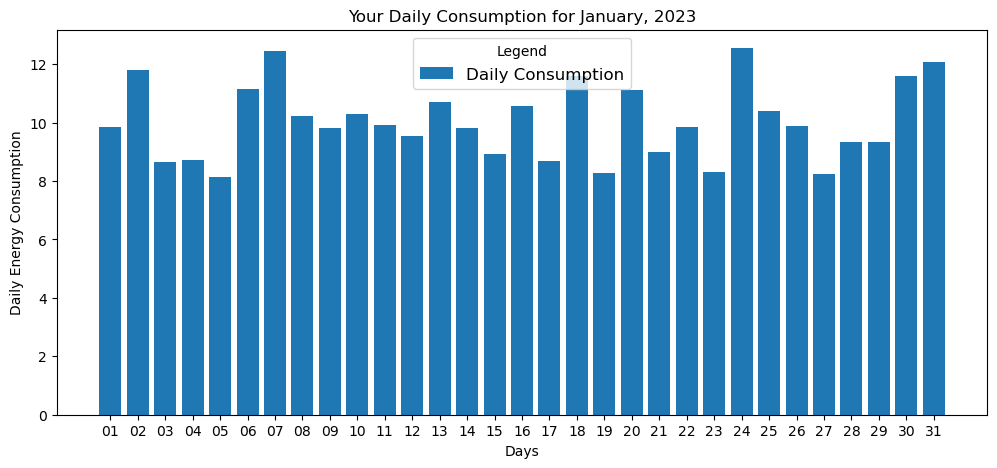

In [33]:
# slicing the first month as an example of customer-focused metrics
df_mon_1 = df_sample_user[df_sample_user['date_col'].dt.month == 1]

print("\n*Usage Overview*")
print(f"\nYour total consumption for January, 2023 was: {df_mon_1['monthly_cons'][0]} (your desired energy unit of measurement)")
print(f"\nYou have visited your EnergyApp {df_mon_1['daily_visits'].sum()} times this month - you are all set!")
print(f"\nYour home/business uses {(df_mon_1['mcons_per_sqm'][0]).round(2)} energy per square meter - the country's average in our EnergyApp is {round(df_inf['monthcons_area'].mean(),2)}")

x_axis = df_mon_1['date_col']
y_axis = df_mon_1['daily_cons']
plt.figure(figsize=(12,5))
plt.bar(x_axis, y_axis, label='Daily Consumption')
plt.legend(title='Legend', fontsize='large', frameon=True)
plt.xlabel('Days')
plt.ylabel('Daily Energy Consumption')
plt.title('Your Daily Consumption for January, 2023')

days = [d.strftime('%d') for d in x_axis]  # retrieve the day of the month as a string
plt.xticks(x_axis, days)

plt.show()

Note that the legend above is obviously not necessary, but just a reminder that the user could potentially add further graph layers.

## 4.2 B2B-Focused (external stakeholders)

External stakeholders and B2B clients of our app (in this case, energy utility companies), will require a different set of metrics, more information of customer statistics, energy usage patterns, etc. Below follow just a few examples of information that could useful for such external parties. No need to generate artificial data here, we can use our infused original dataset.

**Example metrics seen by end-users**

First, let us start with a standard graph: Average Energy Consumption per Month. Let's assume that our B2B client is interested in seeing a breakdown of average energy consumption for all users during 2016. A barplot equipped with a polynomial trendline will be useful here.

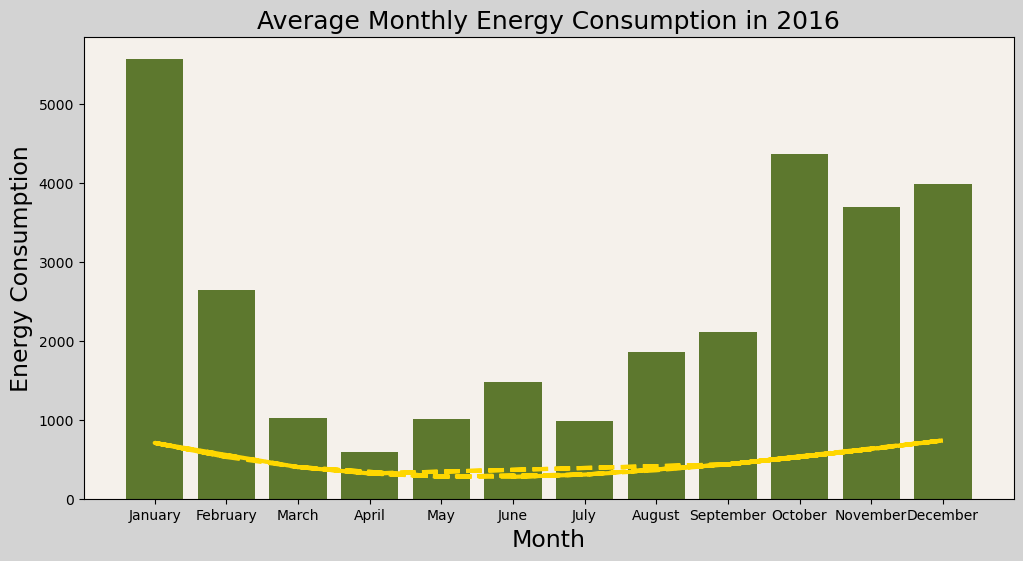

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# slicing dataframe for year 2016
df_2016 = df_inf[df_inf['customer_since'].dt.year == 2016]
x = df_2016['customer_since'].dt.month
y = df_2016['avgmonth_cons']

plt.figure(figsize=(12,6),facecolor='#d3d3d3')
plt.bar(x, y, color='#5d782e')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', size=17)
plt.ylabel('Energy Consumption', size=17)
plt.title('Average Monthly Energy Consumption in 2016', size=18)

ax = plt.gca()
ax.set_facecolor('#f5f1eb')

# add trendline to the plot
# I opted for degree 3 choice which is for a cubic polynomial (quadratric) trendline 
# it follows the equation y = ax^3 + bx^2 + cx + d. Note that a,b,c,d are our coefficients and x is our variable 
#  we specify the coefficients with np.polyfit(x,y, degrees = 1 to 3)
# degree 1 is linear fit, degree 2 is polynomial quadratic, and degree 3 is cubic polynomial
z = np.polyfit(x, y, 3) # specifying coefficients
p = np.poly1d(z) # using the coefficients to create the function
plt.plot(x, p(x), color="gold", linewidth=3, linestyle="--")

plt.show()

Second, let's move to average energy consumption per square meter for the same year.

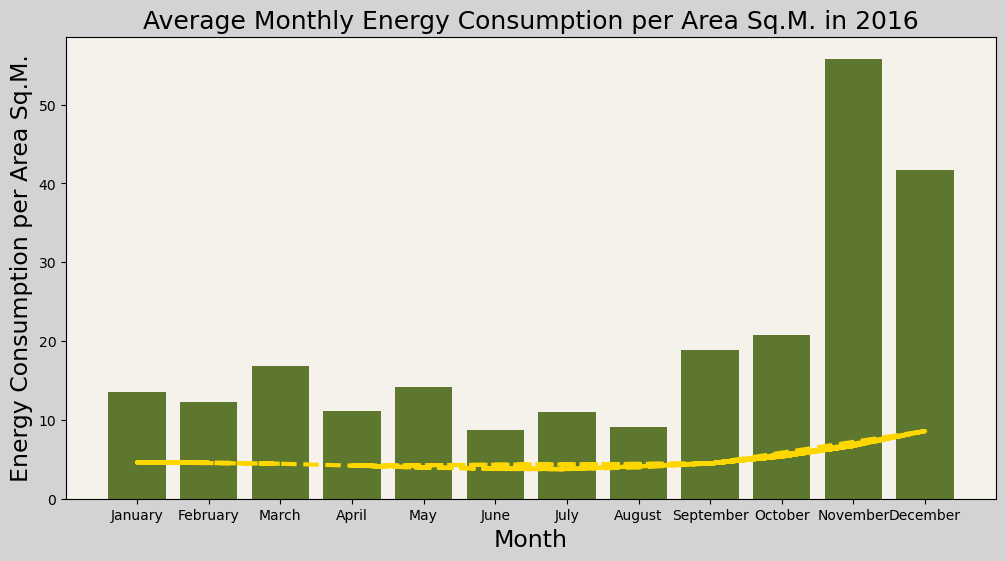

In [35]:
import matplotlib.pyplot as plt
import numpy as np

df_2016 = df_inf[df_inf['customer_since'].dt.year == 2016]
x = df_2016['customer_since'].dt.month
y = df_2016['monthcons_area']

plt.figure(figsize=(12,6),facecolor='#d3d3d3')
plt.bar(x, y, color='#5d782e')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', size=17)
plt.ylabel('Energy Consumption per Area Sq.M.', size=17)
plt.title('Average Monthly Energy Consumption per Area Sq.M. in 2016', size=18)

ax = plt.gca()
ax.set_facecolor('#f5f1eb')

# adding a trendline to the plot
z = np.polyfit(x, y, 3) # specifying coefficients
p = np.poly1d(z) # using the coefficients to create the function
plt.plot(x, p(x), color="gold", linewidth=3, linestyle="--")

plt.show()

Third, let's create a few useful statistics for our B2B clients featuring at the core our newly formed payment status (time-to-payment variable) and four key variables: 'Avg Time-to-Payment', 'Avg Daily Cons.', 'Avg Monthly Cons.', 'Avg Monthly Cons. per Area Sq.M.'

In [36]:
tab_dict = {
    'avg_paym': 'mean',
    'avg_dcons': 'mean',
    'avgmonth_cons': 'mean',
    'area': 'mean',
    'monthcons_area': 'mean'}

grouped_df = df_inf.groupby('paym_status').agg(tab_dict)
grouped_df = grouped_df.round(2)
tab_data = grouped_df.reset_index().values.tolist()
headers = ['Payment Status', 'Avg Time-to-Payment', 'Avg Daily Cons.', 'Avg Monthly Cons.', 'Area Sq.M.', 'Avg M-Cons.per Area']

print(f"\nOverview statistics for all customers in years {df_inf['customer_since'].dt.year.unique()}")
print("\nFeaturing: Payment Status, Average Time-to-Payment, Average Daily Consumption, Average Montly Consumption,  Average Area in Square Meters, Average Monthly Consumption per Area in Square Meters.\n")
print(tabulate(tab_data, headers=headers, tablefmt='psql', showindex=False))


Overview statistics for all customers in years [2015 2014 2016 2017]

Featuring: Payment Status, Average Time-to-Payment, Average Daily Consumption, Average Montly Consumption,  Average Area in Square Meters, Average Monthly Consumption per Area in Square Meters.

+------------------+-----------------------+-------------------+---------------------+--------------+-----------------------+
| Payment Status   |   Avg Time-to-Payment |   Avg Daily Cons. |   Avg Monthly Cons. |   Area Sq.M. |   Avg M-Cons.per Area |
|------------------+-----------------------+-------------------+---------------------+--------------+-----------------------|
| high_paym        |                -14.16 |             14.77 |              443.14 |        97.78 |                  5.04 |
| low_paym         |                 13.08 |             14.54 |              436.16 |        89.6  |                  5.21 |
| mid_paym         |                  2.69 |             16.58 |              497.49 |       104.56 |   

**What insights can we communicate to our B2B clients?**

As expected it is beyond the scope of this python project to explore and investigate each and every statistic, however, it is important to note that we should be effective in our communication with our clients and deliver any insights we uncover.

In this case for example, by investigating the table above, we can see that although the average monthly consumption remains surprisingly constant among the segmentation of payment status for the end-users, there are significant differences in the average time-to-payment and energy consumption per area (in square meters). More specifically, it seems that our high-payment status users (i.e. the ones at the top of the payment threshold that pre-paid their balance accounts) actually consume the less energy than the average payment status users.

Additionally, there is another interesting finding in the low-payment status users (i.e. the ones that delay the most out of all users to settle their balance accounts). Even though they appear to utilize energy to power a lot smaller square meters in their homes/businesses compared to the other groups (notice the 89.6 average sq.meters area) and do consume less on average both on a daily and monthly basis, they actually have the largest amount of [Average Monthly Consumption per Area in Square Meters] (notice the 5.21 score). Meaning that they use more energy in less sq.m. area.

Fourth, we should also include a visual nominal/descriptive categorization by leveraging users' background information. We could use [marital_status] which could prove as an indication of future usage, segmentation by [longevity] which can be used to provide usage discounts based on how long a customer has been with our B2B client, or we can also choose [educational_level]. Let's go with the latter option as an example and generate a donut chart.

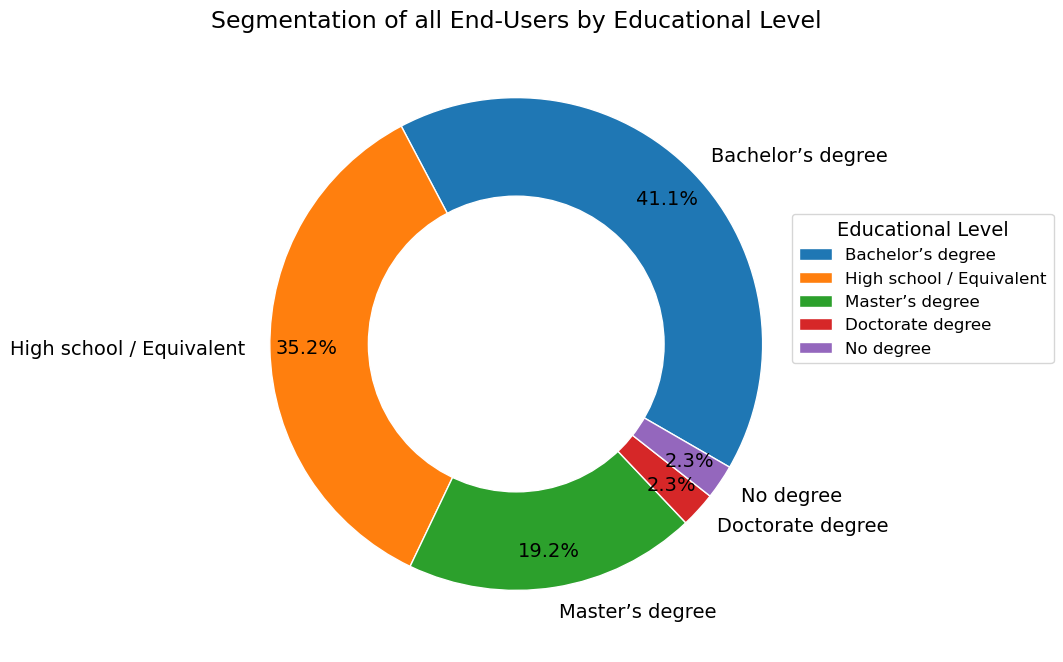

In [37]:
edu_counts = df_inf['educational_level'].value_counts()

# let's rename the "High school graduate" category in order to same some space in our graph!
edu_counts.rename(index={'High school graduate, diploma or the equivalent': 'High school / Equivalent'}, inplace=True)

fig, ax = plt.subplots(figsize=(8, 8))
wedges, labels, autopct = ax.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 14}, startangle=-30, wedgeprops=dict(width=0.6, edgecolor='w'))
plt.setp(labels, fontsize=14)

my_circle = plt.Circle((0, 0), 0.6, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Segmentation of all End-Users by Educational Level', fontsize=17)
plt.legend(wedges, edu_counts.index, title='Educational Level', loc='center', bbox_to_anchor=(1.16, 0.59), fontsize=12, title_fontsize=14)

plt.show()

## 4.3 Internal-Focused (internal stakeholders)

Finally, for internal use, there's a myriad of various metrics that we can utilize include the ones created earlier.

For starters, recall one of the metrics designed in the previous sections, the variable [monthcons_pervisit] which stands for "monthly consumption per visit". It shows how much energy consumption is "needed" (per se) for a customer to perform one single visit in either the web or mobile app platforms. While I mentioned that it might appear counter-intuitive, it can actually be quite helpful - and the graph below illustrates this.

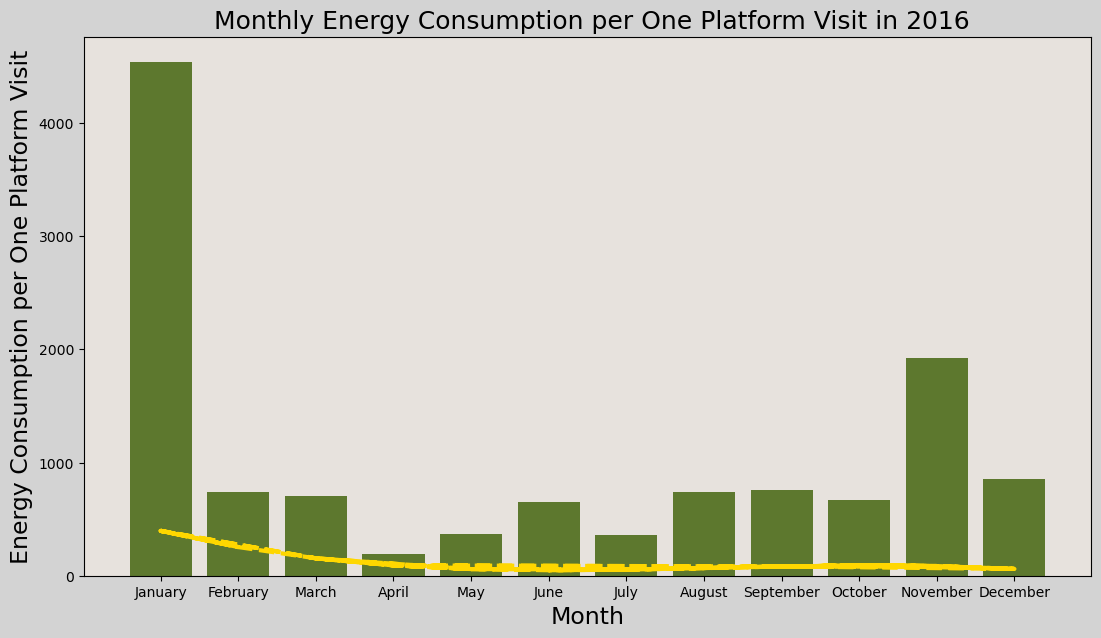

In [38]:
import matplotlib.pyplot as plt
import numpy as np

df_2016 = df_inf[df_inf['customer_since'].dt.year == 2016]
x = df_2016['customer_since'].dt.month
y = df_2016['monthcons_pervisit']

plt.figure(figsize=(13,7),facecolor='#d3d3d3')
plt.bar(x, y, color='#5d782e')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', size=17)
plt.ylabel('Energy Consumption per One Platform Visit', size=17)
plt.title(' Monthly Energy Consumption per One Platform Visit in 2016', size=18)

ax = plt.gca()
ax.set_facecolor('#e7e2dd')

# add trendline to the plot
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x, p(x), color="gold", linewidth=3, linestyle="--")

plt.show()

This graph shows that in 2016 the amount of platform visits was inversely related to the amount of monthly energy consumed - but only for January! Surprisingly, this effect is not found in such a magnitude in any other month that year, with a slight exception for November.

At this point, one of our sharp-eyed colleagues may make the following astute observation: wouldnt this information be already present in a stand graph with [average visits] to both platforms? Well, let's check it out!

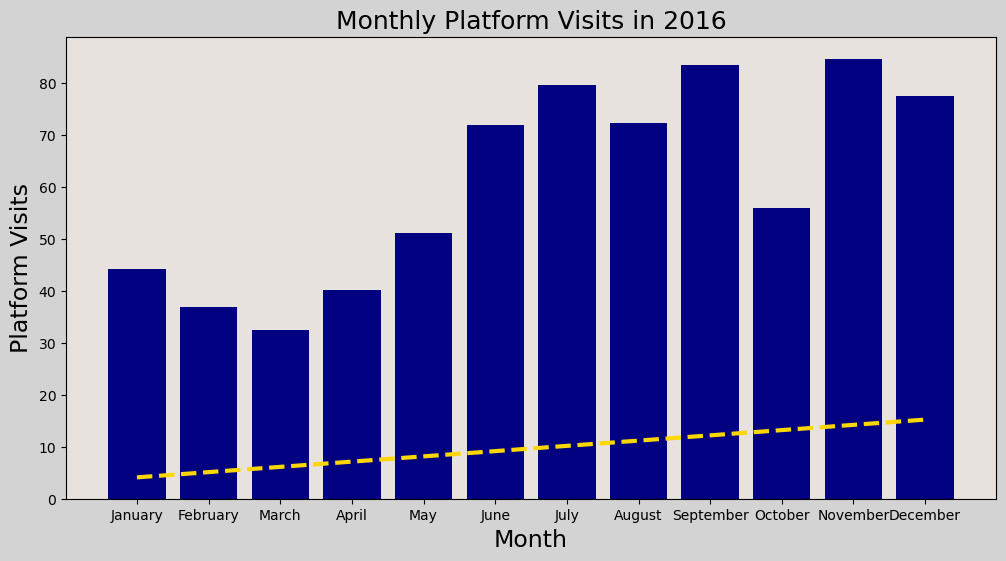

In [39]:
import matplotlib.pyplot as plt
import numpy as np

df_2016 = df_inf[df_inf['customer_since'].dt.year == 2016]
x = df_2016['customer_since'].dt.month
y = df_2016['avg_mvisits']

plt.figure(figsize=(12,6),facecolor='#d3d3d3')
plt.bar(x, y, color='navy')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', size=17)
plt.ylabel('Platform Visits', size=17)
plt.title('Monthly Platform Visits in 2016', size=18)

ax = plt.gca()
ax.set_facecolor('#e7e2dd')

# add trendline to the plot
z = np.polyfit(x, y, 1) # opting for a linear trendline, degree 1
p = np.poly1d(z)
plt.plot(x, p(x), color="gold", linewidth=3, linestyle="--")

plt.show()

As we can see in the barplot above, that is clearly not the case!

Although there is no definitive answer in statistics, by combining multiple metrics we can reach more informed decisions.

Let's speed up our analysis and add a few more interesting metrics and KPIs.

Similarly, we can perform various feature engineering tasks for our colleagues based on their core job tasks including: billing and payments, marketing and online tracking, statistics and area segmentation, etc. For example, lets start by revisiting the payment status column, if our colleagues in billing are interested in our categorization we can create a designated column for them that explicitly states if a payment is delayed, on time, or paid in advance. let's create a lambda function to perform the same task. 

In [40]:
# variable just for billing - explicit payment categorization
df_inf['payment_index'] = df_inf['avg_paym'].apply(lambda x: 'advance' if x < 0 else ('on time' if x <= 15 else 'delayed'))

In [41]:
# now lets create a variable for our colleagues in marketing that shows 
# the ratio between visits in our web platform versus our mobile platform
df_inf['web_to_mob_visit_ratio'] = df_inf['avg_webvisits'] / df_inf['avg_mobvisits']

In [42]:
# since we have no payment data here let us create some

# let's define a standard price point for unit of energy consumption - just for illustration purposes
#  After a quick search we can find the range of prices per kw
# Going through Energy 2024 Statistics, it would appear Greece has one the highest in Europe while Finland has some of the lowest worldwide, let's settle at 0.25 for this example
price_per_unit = 0.25
# now lets create a new column for this potential revenue generated per end-user
df_inf['potential_revenue'] = df_inf['avgmonth_cons'] * price_per_unit

One more check at our infused dataset before continuing.

In [43]:
df_inf.head()

,user_id,avg_dcons,avg_paym,customer_since,area,age,marital_status,educational_level,prefecture,avg_mvisits,...,avg_mobvisits,paym_status,vis_status,longevity,monthcons_area,avgmonth_cons,monthcons_pervisit,payment_index,web_to_mob_visit_ratio,potential_revenue
0,1,8.02,-33.71,2015-05-14,135,40-55,Married,Master’s degree,Neon-Attika,0.86,...,0.33,high_paym,low_visits,long_term customer,1.78,240.6,279.77,advance,1.606061,60.150
1,2,25.04,-3.11,2015-06-02,100,30-39,Married,Bachelor’s degree,Corinthus Crossroads,4.13,...,3.44,high_paym,low_visits,long_term customer,7.51,751.2,181.89,advance,0.200581,187.800
2,3,8.18,15.89,2015-06-29,130,40-55,Married,Master’s degree,Neon-Attika,2.92,...,0.56,low_paym,low_visits,long_term customer,1.89,245.4,84.04,delayed,4.196429,61.350
3,4,12.81,-2.38,2015-03-19,86,40-55,Married,Master’s degree,Neon-Attika,0.82,...,0.23,high_paym,low_visits,long_term customer,4.47,384.3,468.66,advance,2.565217,96.075
4,5,9.16,14.10,2014-08-22,65,30-39,Married,Bachelor’s degree,Evoa Conglomerate,10.63,...,7.00,low_paym,mid_visits,long_term customer,4.23,274.8,25.85,on time,0.518571,68.700


Now let's add some interesting KPIs like ROI calculators, for example, calculating ROI for online platforms. Again, this is a hypothetical example in our infused dataset since the original one does not have the data we require.

In [44]:
# standard practice, replacing NaN with 0s
df_inf['potential_revenue'] = df_inf['potential_revenue'].fillna(0)

# total potential revenue
total_revenue = df_inf['potential_revenue'].sum()

# for total investment, lets assume that we spend a set amount per user based on their combined online activity at the low threshold of the 25th percentile (or first quartile)
total_investment = df_inf['avg_mvisits'].sum() *  df_inf['avg_mvisits'].quantile(0.25)
roi = (total_revenue - total_investment) / total_investment * 100
print("\nFor internal use only.")
print("\nROI calculator for Web & Mobile platforms based on low quartile threshold:\n")
print('Online Platform ROI:', round(roi, 2), '%')


For internal use only.

ROI calculator for Web & Mobile platforms based on low quartile threshold:

Online Platform ROI: 180.44 %


We should also add a mandatory visualization based on prefecture location. As is seen in the table below, we have the largest amount of energy consumed in the largest prefectures, which is unsuprising since we also have a imbalanced value counts for each prefecture.

In [45]:
top_10_prefs = df_inf.groupby(['prefecture'])['avg_paym'].sum().sort_values(ascending=False).head(10)
top_10_index = top_10_prefs.index
df_top_10_prefs = df_inf[df_inf['prefecture'].isin(top_10_prefs)]
mean_dcons = df_inf.groupby(['prefecture'])['avg_dcons'].mean().head(10)

df_tabulated = pd.DataFrame({
    'Prefecture': top_10_index,
    'Total Count': total_count.values,
    'Average Daily Consumption': mean_dcons.values,
    'Sum of Consumption': top_10_prefs.values})

print(tabulate(df_tabulated, headers='keys', tablefmt='psql'))

NameError: name 'total_count' is not defined

In [ ]:
df = df_inf.groupby(['prefecture'])['avg_dcons'].mean().sort_values().head(10)

plt.figure(figsize=(12,6), facecolor='#d3d3d3')
sns.set(style="darkgrid")

plt.bar(df.index, df.values, color='navy')
plt.xticks(rotation=45)
plt.xlabel('Prefecture')
plt.ylabel('Average Daily Consumption')
plt.title('Top 10 Prefectures by Average Daily Consumption')
plt.show()

# 5. Follow-Up Analysis

## 5.1. Heatmap

Checking through correlations may not offer much for this particularly project but is always a good idea to have a basic overview of key correlated variables.

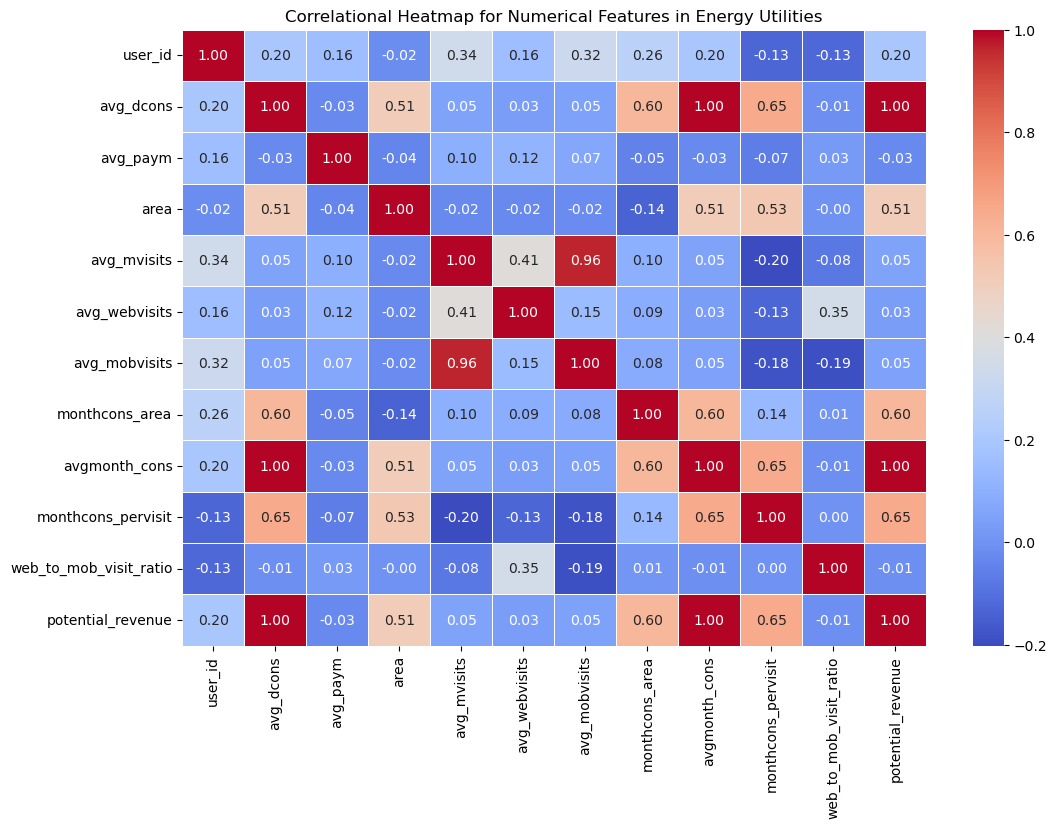

In [46]:
# selecting our numerical columns for correlation
numerical_df_inf = df_inf.select_dtypes(include=['float64', 'int64'])

# calculating  correlation matrix for our numerical columns
correlation_matrix = numerical_df_inf.corr()

# creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlational Heatmap for Numerical Features in Energy Utilities")
plt.show()

## 5.2 Correlational analysis and Dealing with Outliers

We can also run a simple test to see whether we meet the requirements for normal distribution and whether or not we can use Pearson's correlation coefficient or opt for Spearman's.

In [47]:
from scipy.stats import shapiro
stat, p = shapiro(df_inf['avg_dcons'])
if p > 0.05:
    print('Our data follows a normal distribution')
else:
    print('Our data does not follow a normal distribution')

Our data does not follow a normal distribution


Since we do not meet the criteria for normal distribution we must opt for Spearman corr coefficient, and visualize the result. Even those we have a low correlation coeffiecient, as an example here, I have choosen to test the average daily consumption versus average platform visits.

In [48]:
import scipy.stats as stats
corr, p_value = stats.spearmanr(df_inf['avg_dcons'], df_inf['avg_mvisits'])
print('Spearman correlation coefficient:', corr)
print('p-value:', p_value)

Spearman correlation coefficient: 0.12545079324661385
p-value: 9.240794893313979e-06


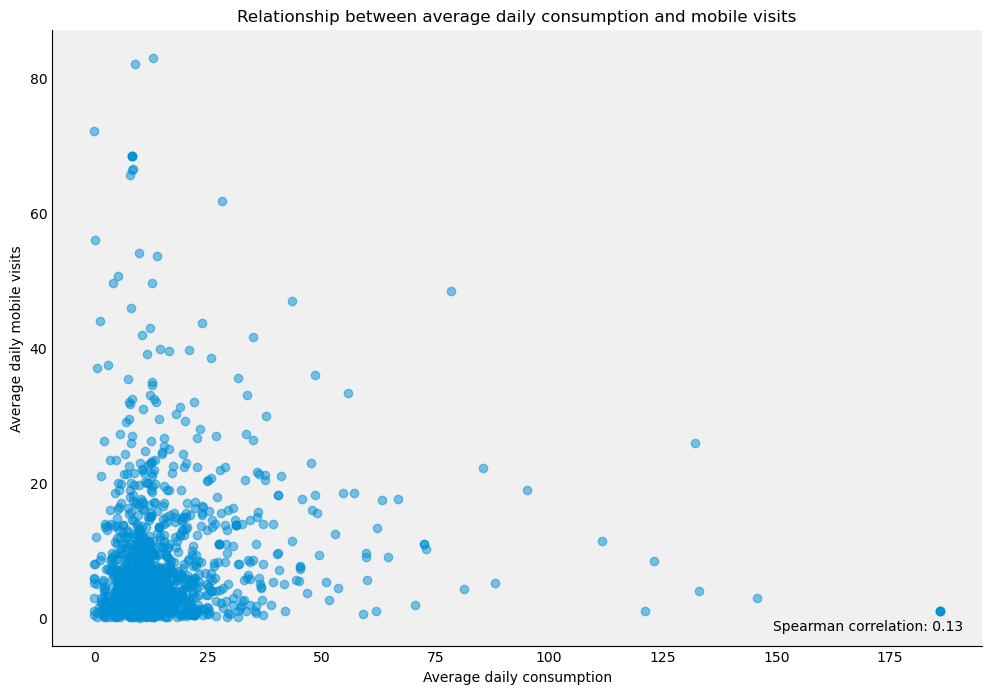

In [49]:
# opting  for a scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_inf['avg_dcons'], df_inf['avg_mobvisits'], color='#008fd5', alpha=0.5)

# adding our correlation info
corr = df_inf[['avg_dcons', 'avg_mvisits']].corr(method='spearman').iloc[0,1]
corr_str = '{:.2f}'.format(corr)
ax.text(0.98, 0.02, f'Spearman correlation: {corr_str}', ha='right', va='bottom', transform=ax.transAxes)

ax.set_xlabel('Average daily consumption')
ax.set_ylabel('Average daily mobile visits')
ax.set_title('Relationship between average daily consumption and mobile visits')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f0f0f0')
ax.tick_params(axis='both', which='both', length=0)

plt.show()

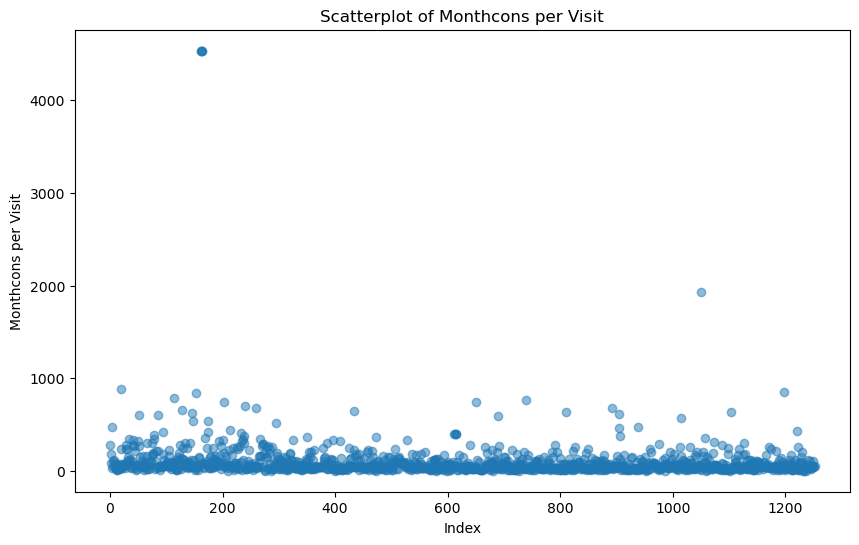

In [50]:
# Scatter plot for the 'monthcons_pervisit' column
plt.figure(figsize=(10, 6))
plt.scatter(df_inf.index, df_inf['monthcons_pervisit'], alpha=0.5)
plt.title("Scatterplot of Monthcons per Visit")
plt.xlabel("Index")
plt.ylabel("Monthcons per Visit")
plt.show()

It appears we have a couple of notable outliers, let's run an interquartile (IQR) analysis to find and delete them. 

In [51]:
# finding Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_inf['monthcons_pervisit'].quantile(0.25)
Q3 = df_inf['monthcons_pervisit'].quantile(0.75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# finding the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find and remove outliers
df_inf_modified = df_inf[~((df_inf['monthcons_pervisit'] < lower_bound) | (df_inf['monthcons_pervisit'] > upper_bound))]

# checking the shape of the original and cleaned DataFrame
print(f"Original DataFrame shape: {df_inf.shape}")
print(f"Modified DataFrame shape: {df_inf_modified.shape}")

Original DataFrame shape: (1242, 21)
Modified DataFrame shape: (1120, 21)


Running the scatterplot again with the modified dataset.

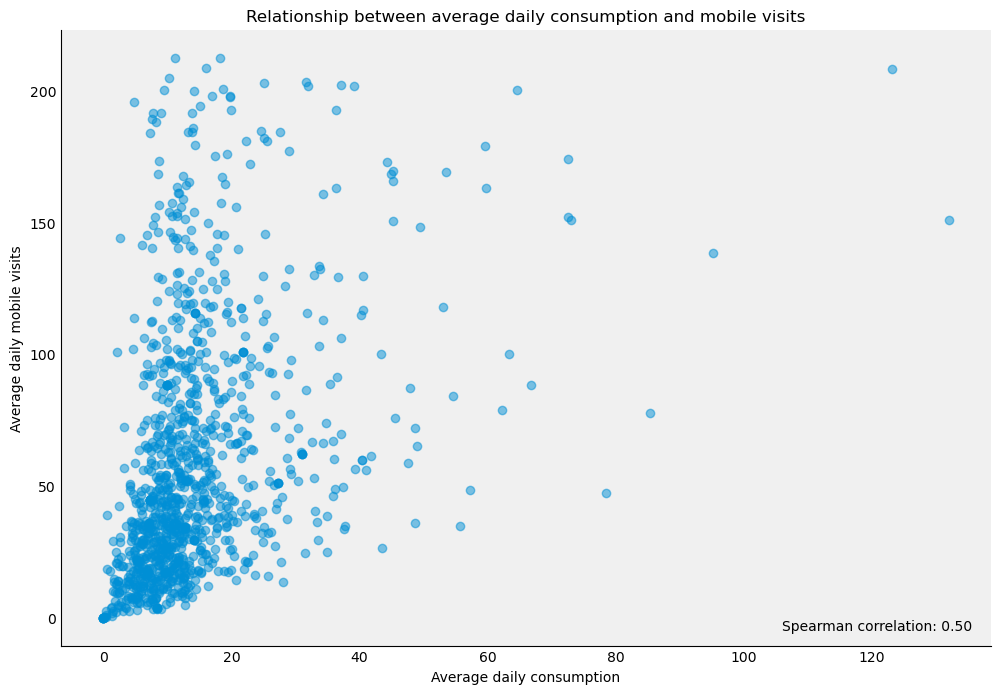

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_inf_modified['avg_dcons'], df_inf_modified['monthcons_pervisit'], color='#008fd5', alpha=0.5)

# adding our correlation info
corr = df_inf_modified[['avg_dcons', 'monthcons_pervisit']].corr(method='spearman').iloc[0,1]
corr_str = '{:.2f}'.format(corr)
ax.text(0.98, 0.02, f'Spearman correlation: {corr_str}', ha='right', va='bottom', transform=ax.transAxes)

ax.set_xlabel('Average daily consumption')
ax.set_ylabel('Average daily mobile visits')
ax.set_title('Relationship between average daily consumption and mobile visits')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f0f0f0')
ax.tick_params(axis='both', which='both', length=0)

plt.show()

## 5.2. Quick Data Aggregation

Note that we can also create various new sliced datasets, pivot tables, and other grouped data to assist our colleagues in their daily tasks. A few examples are shown below.

In [53]:
# Specify the columns you want to aggregate
columns_to_aggregate = ['avg_dcons', 'avg_paym', 'monthcons_area']  # Example columns

# Group by 'prefecture' and sum the specified columns
grouped_sum = df_inf.groupby('prefecture')[columns_to_aggregate].sum()

print(grouped_sum)

                      avg_dcons  avg_paym  monthcons_area
prefecture                                               
Achaon Convergence       392.08    109.81          125.87
Aitol Nexus              155.09     87.76           52.78
Arcadia Wyld              48.91    -33.28           16.38
Argolith Supreme          78.14     26.43           22.31
Artanon                   67.39     57.37           31.75
Cephalpod                 75.02     40.17           36.72
Chanion Underhive        349.07     25.48          103.41
Copper-Forged             62.73      7.51           29.77
Corinthus Crossroads     285.37     41.47          115.92
Cyclotron                 16.90      1.88            7.24
Dramasynth               180.52     22.25           42.57
Eurytan                   30.14    -11.00            8.83
Evoa Conglomerate        212.27    -89.00           76.59
Evrax                    318.82     97.23           73.98
Florinix                   5.99     25.20            2.15
Grevenoth     

In [54]:
# retrieving the top prefectures
pref_top10 = df_inf.groupby('prefecture')['potential_revenue'].sum().nlargest(10)
# retrieving its index
index_p10 = pref_top10.index
# slicing df based on top10 prefecture index
df10 = df_inf[df_inf['prefecture'].isin(index_p10)]

In [55]:
numeric_cols = df10.select_dtypes(include='number').columns
# group by and calculate mean for numeric columns only
pivdata_3levels = df10.groupby(['prefecture', 'marital_status', 'educational_level'], as_index=False)[numeric_cols].mean()
pivdata_3levels.head()

,prefecture,marital_status,educational_level,user_id,avg_dcons,avg_paym,area,avg_mvisits,avg_webvisits,avg_mobvisits,monthcons_area,avgmonth_cons,monthcons_pervisit,web_to_mob_visit_ratio,potential_revenue
0,Achaon Convergence,Divorced,"High school graduate, diploma or the equivalent",1184.000000,10.880000,0.500000,74.000000,10.500000,3.000000,7.500000,4.410000,326.400000,31.090000,0.400000,81.600000
1,Achaon Convergence,Married,Bachelor’s degree,874.888889,21.588889,8.782222,116.333333,13.884444,2.241111,11.642222,5.943333,647.666667,71.403333,0.339238,161.916667
2,Achaon Convergence,Married,"High school graduate, diploma or the equivalent",734.166667,14.245000,3.041667,107.166667,13.115000,3.546667,9.566667,6.046667,427.350000,62.303333,8.827025,106.837500
3,Achaon Convergence,Married,Master’s degree,783.000000,16.372500,1.972500,124.750000,12.152500,1.412500,10.740000,4.315000,491.175000,66.822500,0.497554,122.793750
4,Achaon Convergence,Married,No degree,118.000000,15.690000,4.000000,100.000000,4.210000,2.210000,2.000000,4.710000,470.700000,111.810000,1.105000,117.675000


## 5.3. Additional Visualizations

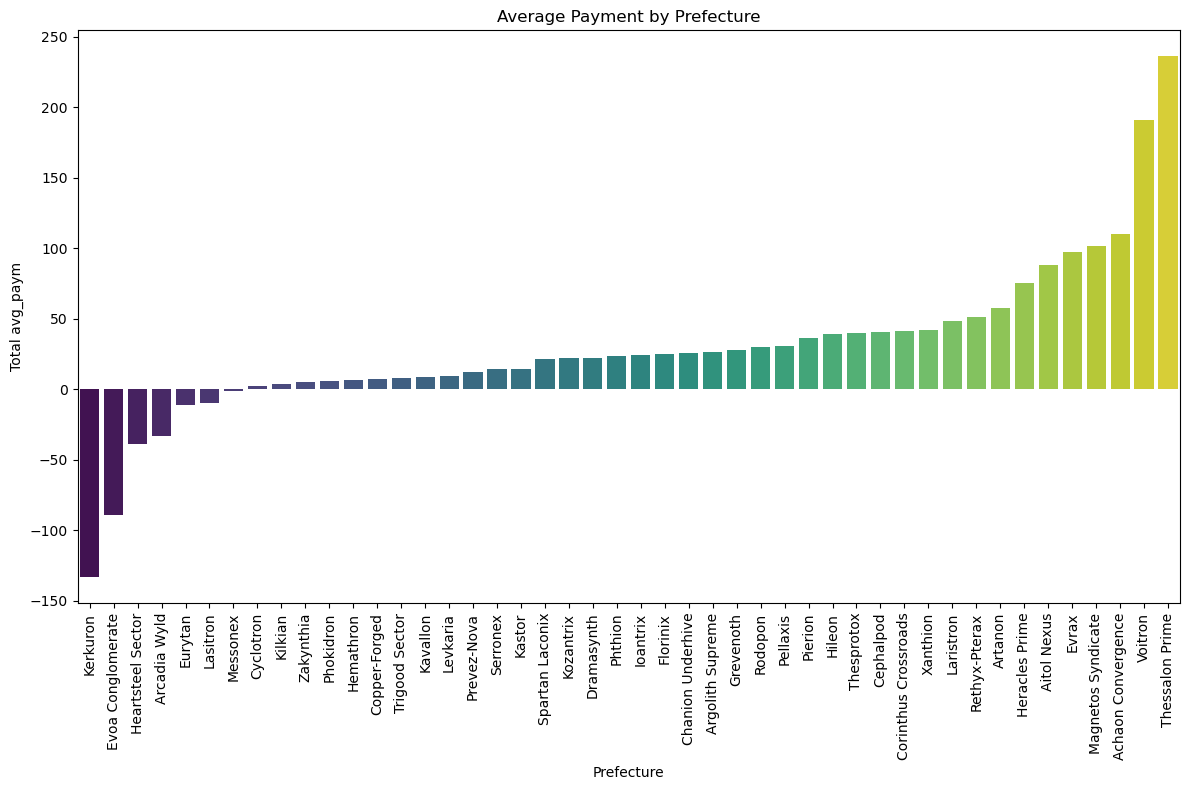

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# filter out 'Neon-Attika' since it will mess up the graphic due to it size
filtered_grouped_sum = grouped_sum[grouped_sum.index != 'Neon-Attika']

# reset index for plotting
df_plot = filtered_grouped_sum.reset_index()

# sort the data by 'avg_paym' in ascending order
df_plot_sorted = df_plot.sort_values(by='avg_paym')


plt.figure(figsize=(12, 8))
sns.barplot(x='prefecture', y='avg_paym', data=df_plot_sorted, palette='viridis')

plt.title('Average Payment by Prefecture')
plt.xlabel('Prefecture')
plt.ylabel('Total avg_paym')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Notice that while the users in certain locations have higher consumptions and thus greater average payments, there are other prefectures that are lagging behind in payments.

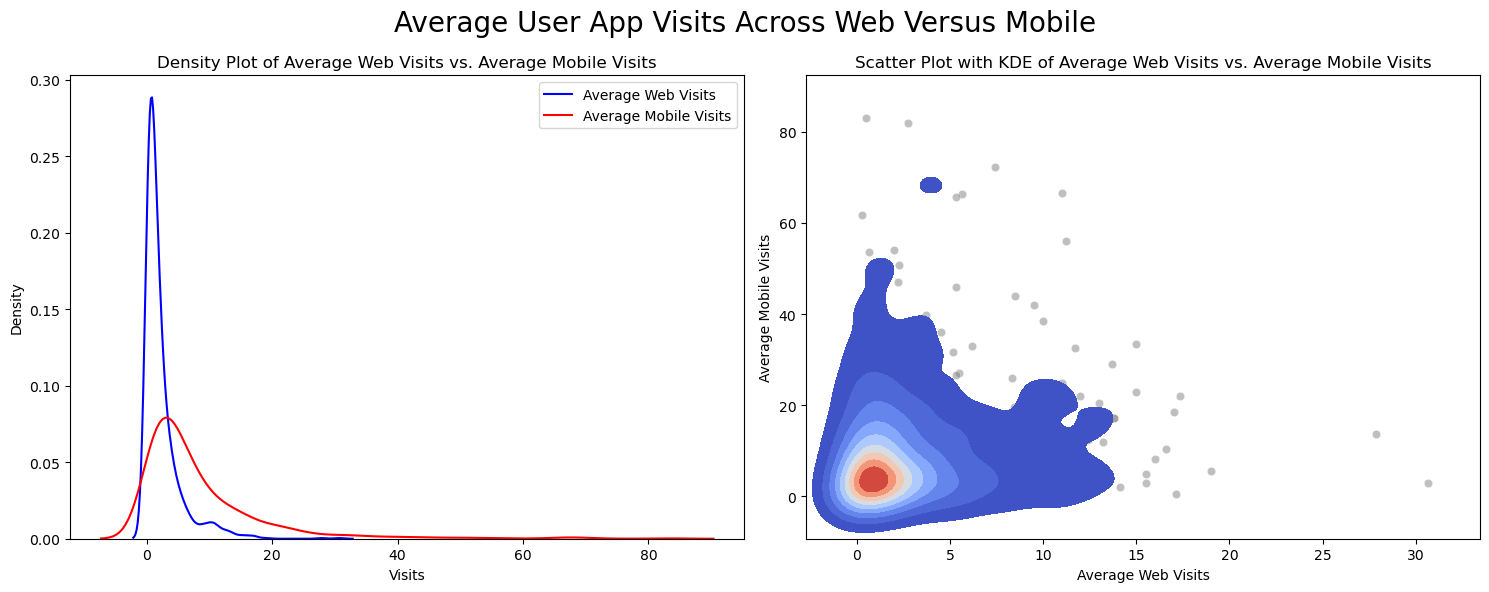

In [57]:
# We can also visualize the average visits for the web platform versus the mobile app using
# 1) a density plot and 2) a scatterplot

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# density plot KDE  for 'avg_webvisits' and 'avg_mobvisits'
sns.kdeplot(df_inf['avg_webvisits'], label='Average Web Visits', fill=False, color='blue', ax=axes[0])
sns.kdeplot(df_inf['avg_mobvisits'], label='Average Mobile Visits', fill=False, color='red', ax=axes[0])
axes[0].set_title('Density Plot of Average Web Visits vs. Average Mobile Visits')
axes[0].set_xlabel('Visits')
axes[0].set_ylabel('Density')
axes[0].legend()

# scatter plot with KDE overlay
sns.scatterplot(x='avg_webvisits', y='avg_mobvisits', data=df_inf, alpha=0.5, color='gray', ax=axes[1])
sns.kdeplot(x='avg_webvisits', y='avg_mobvisits', data=df_inf, cmap='coolwarm', fill=True, ax=axes[1])
axes[1].set_title('Scatter Plot with KDE of Average Web Visits vs. Average Mobile Visits')
axes[1].set_xlabel('Average Web Visits')
axes[1].set_ylabel('Average Mobile Visits')

plt.suptitle("Average User App Visits Across Web Versus Mobile", fontsize=20)
plt.tight_layout()
plt.show()

# Conclusion

There is a lot of interesting information in this dataset and even thought we may lack a few values it is worthwhile to explore various possibilities.

Certain versatile analyses and metrics can be used for various stakeholders but we certainly need to understand what each entity or third party is interested based on their core business model so we can adjust accordingly.

As mentioned in the first section there are a lot of promising metrics we should include - provided we have additional information!

1. ROI variants tailored specifically for our operation (e.g. return on investment capital, marketing, talent, innovation, etc.) 
2. Customer Retention Rate over Fixed/Variable Timeframe
3. Net Promoter Score (NPS) based on Dynamic Customer Loyalty
4. Customer Lifetime Value (CLV), i.e. what is the total value of our users
5. Churn Rate, i.e. the number of users that stop using our app
6. Conversion Rate, i.e. measurement of a specific type of action that our users take online
7. Average Revenue Per User (ARPU)

For further information feel free to reach out.
If interested for other tutorials regarding:

- Dealing with pesky (or helpful!) outliers
- Dealing with missing values
- Comprehensive guidance for imputation
- Exporatory data analysis
- Feature engineering machine learning tutorials

As well as other deep dives also check out my other projects

All the best,
<br> Dimitrios Pavlakis